<a href="https://colab.research.google.com/github/alyaaahmed019/Sentment-analysis/blob/main/sentiment_analysis(task1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vishakhdapat_imdb_movie_reviews_path = kagglehub.dataset_download('vishakhdapat/imdb-movie-reviews')

print('Data source import complete.')


100%|██████████| 25.7M/25.7M [00:00<00:00, 123MB/s]

Extracting files...


Data source import complete.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import os

df = pd.read_csv(os.path.join(vishakhdapat_imdb_movie_reviews_path, 'IMDB Dataset.csv'))
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
# check null values
print(f'Null values :{df.isnull().sum()}')
print(f'Dupicated values :{df.duplicated().sum()}')

Null values :review       0
sentiment    0
dtype: int64
Dupicated values :418


In [6]:
# drop duplicated values

print("Before:", df.shape)
df = df.drop_duplicates(subset='review')
print("After:", df.shape)

Before: (50000, 2)
After: (49582, 2)


## Text pre-processing

In [7]:
# 1- clean text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)      # remove HTML
    text = re.sub(r'[^a-z\s]', '', text)   # remove punctuation & numbers
    words = text.split()
    words = [w for w in words if w not in stop_words] # remove stop words
    return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
df['clean_review'] = df['review'].apply(clean_text)

/tmp/ipython-input-136903637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_review'] = df['review'].apply(clean_text)


In [9]:
#2- mapping the label
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

/tmp/ipython-input-1861380822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [12]:
df

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...
...,...,...,...
49995,I thought this movie did a down right good job...,1,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,0,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,0,im going disagree previous comment side maltin...


## Label distribution

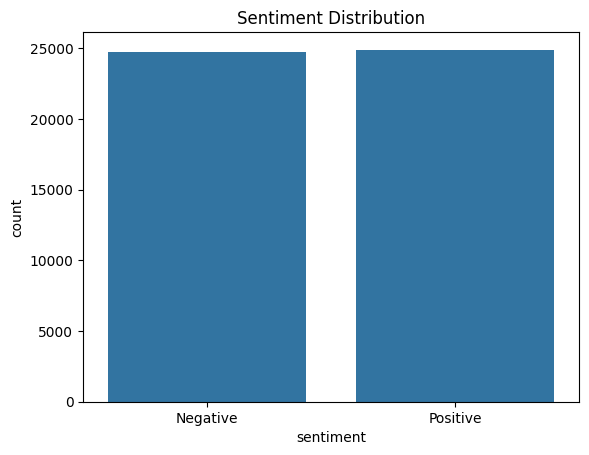

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df['sentiment'])
plt.xticks([0,1], ['Negative', 'Positive'])
plt.title("Sentiment Distribution")
plt.show()

## Visualize the most frequent positive and negative words

In [ ]:
# Load VADER Sentiment Lexicon
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

from collections import Counter

all_words = " ".join(df['clean_review']).split()
w_counts = Counter(all_words)

pos_words = {}
neg_words = {}
for word,count in w_counts.items():
    score = sia.polarity_scores(word)['compound']
    if score >0.3:
            pos_words[word] = count
    elif score <0.3:
        neg_words[word]=count

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Get All Unique Words From Dataset
pos_df = pd.DataFrame(
    pos_words.items(), columns=['word', 'frequency']
).sort_values(by='frequency', ascending=False).head(30)

neg_df = pd.DataFrame(
    neg_words.items(), columns=['word', 'frequency']
).sort_values(by='frequency', ascending=False).head(30)

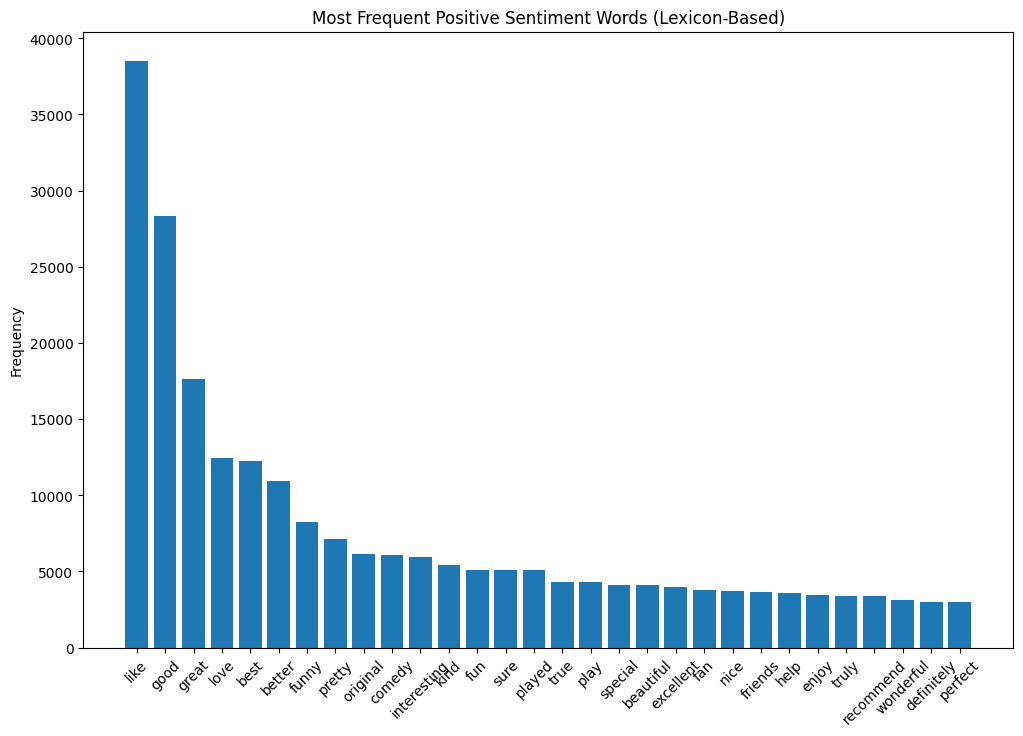

In [ ]:
## positive Sentiment Words

plt.figure(figsize=(12,8))
plt.bar(pos_df['word'], pos_df['frequency'])
plt.title("Most Frequent Positive Sentiment Words")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()


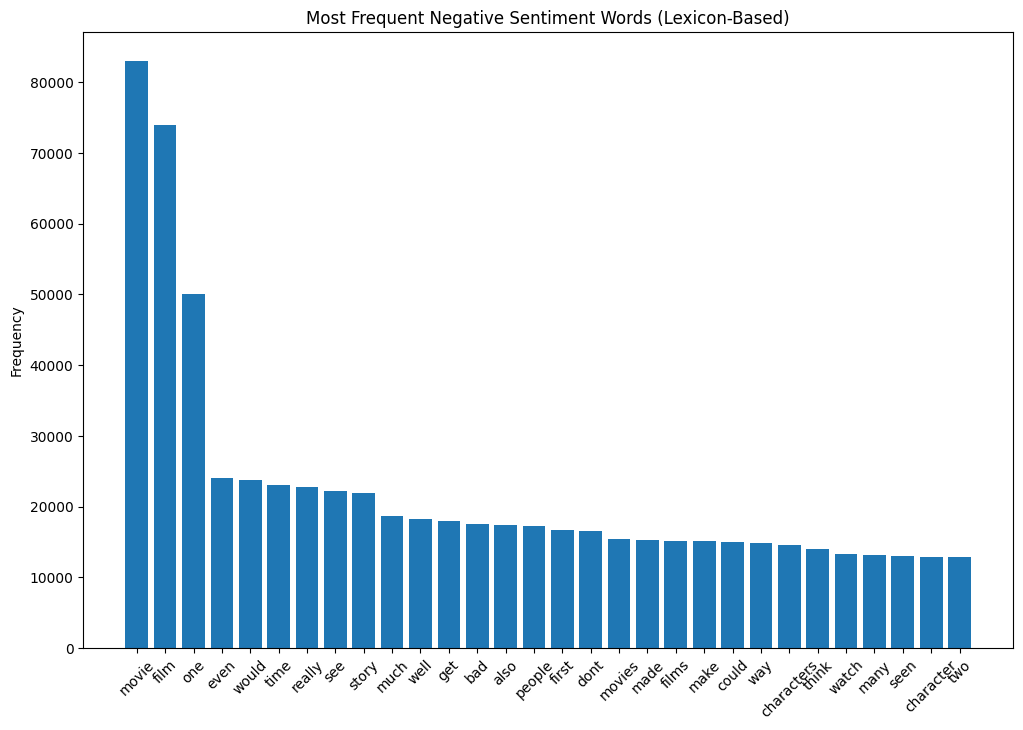

In [ ]:
## Negative Sentiment Words

plt.figure(figsize=(12,8))
plt.bar(neg_df['word'], neg_df['frequency'])
plt.title("Most Frequent Negative Sentiment Words")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

# Model training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# data spliting

X = df['clean_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Vectorization using TFIDF

In [ ]:
tfidf = TfidfVectorizer(
    max_features = 30000,
    ngram_range = (1,2)
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000, C = 2.0, solver='liblinear')
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

In [ ]:
LR_acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:",LR_acc)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8994655641827165
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4940
           1       0.89      0.91      0.90      4977

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



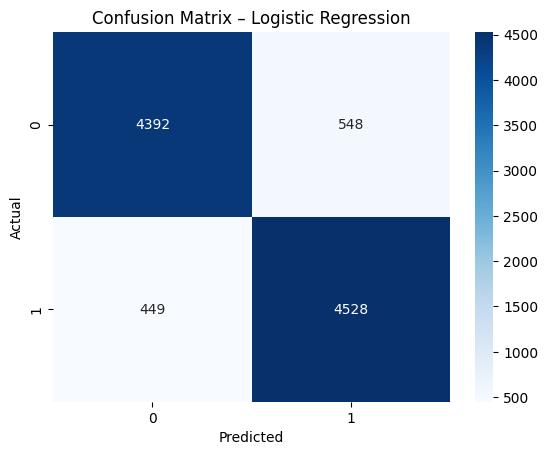

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

In [ ]:
# Naive Bayes

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
NB_acc = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:",NB_acc)

Naive Bayes Accuracy: 0.8779872945447211


In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4940
           1       0.87      0.89      0.88      4977

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



In [ ]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes"],
    "Accuracy": [LR_acc, NB_acc]
})
comparison

,Model,Accuracy
0,Logistic Regression,0.899466
1,Naive Bayes,0.877987


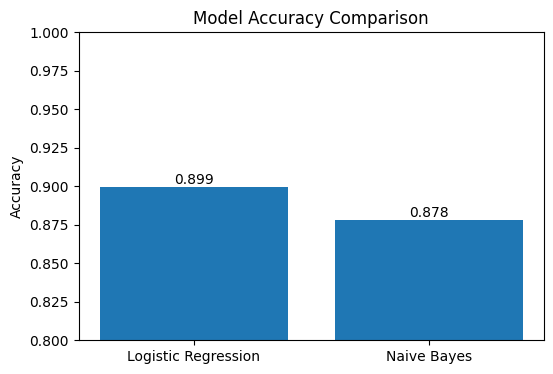

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(comparison["Model"], comparison["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)

for i, v in enumerate(comparison["Accuracy"]):
    plt.text(i, v + 0.002, f"{v:.3f}", ha='center')

plt.show()

In [ ]:
def predict_sentiment(text):
    text = clean_text(text)
    vector = tfidf.transform([text])
    pred = lr.predict(vector)[0]
    return "Positive" if pred == 1 else "Negative"

print(predict_sentiment("This movie was absolutely amazing"))
print(predict_sentiment("Worst film I have ever watched"))

Positive
Negative
